In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import seaborn as sns
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
from scipy.stats.stats import ttest_ind


warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'


<IPython.core.display.Javascript object>

In [4]:
engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)

df = pd.read_sql_query("select * from studentsperformance", con=engine)
engine.dispose()

<IPython.core.display.Javascript object>

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<IPython.core.display.Javascript object>

## 1 ##
Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?


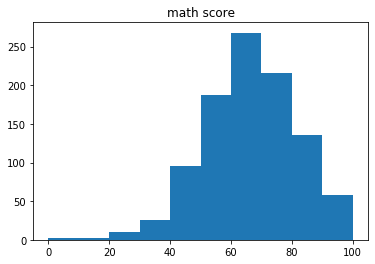

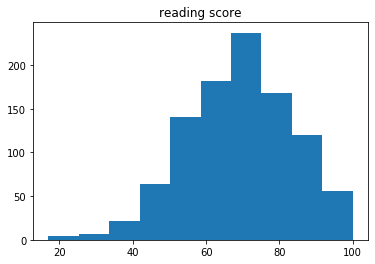

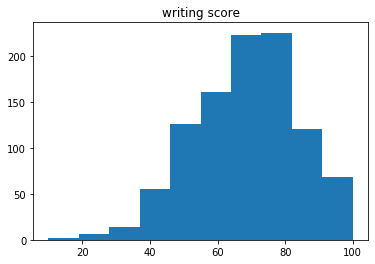

(15.912256686712709, 0.0003505075386818213)
(11.383300575987892, 0.0033740202672214448)
(13.98509448257235, 0.0009187033894586527)


<IPython.core.display.Javascript object>

In [17]:
from scipy.stats import jarque_bera
plt.hist(df["math score"])
plt.title('math score')
plt.show()
plt.hist(df["reading score"])
plt.title('reading score')
plt.show()
plt.hist(df["writing score"])
plt.title('writing score')
plt.show()

print(jarque_bera(df["math score"]))
print(jarque_bera(df["reading score"]))
print(jarque_bera(df["writing score"]))


Seem non-normal, skewed left

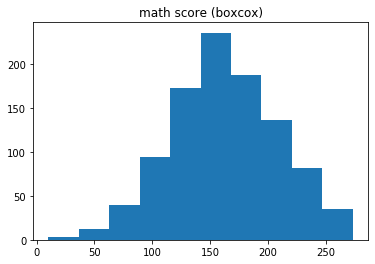

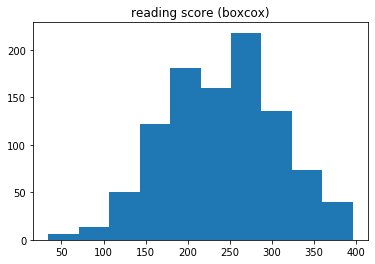

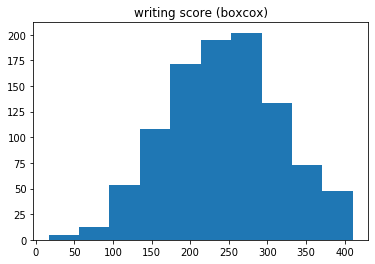

<IPython.core.display.Javascript object>

In [18]:
from scipy.stats import boxcox

math_b,_ = boxcox(df[df["math score"] > 0]["math score"])
reading_b,_ = boxcox(df["reading score"])
writing_b,_ = boxcox(df["writing score"])

plt.hist(math_b)
plt.title('math score (boxcox)')
plt.show()
plt.hist(reading_b)
plt.title('reading score (boxcox)')
plt.show()
plt.hist(writing_b)
plt.title('writing score (boxcox)')
plt.show()


Yes, the mean significantly changes and the distribution is less skewed.

## 2 ##
Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.


(16.60133096430113, 0.00024835149861313077)


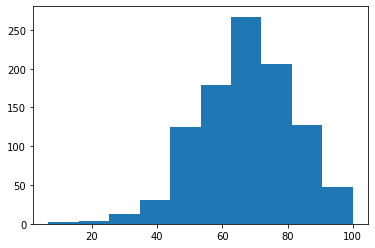

<IPython.core.display.Javascript object>

In [21]:
df["target"] = df["math score"] / 2 + df["reading score"] / 4 + df["writing score"] / 4
print(jarque_bera(df["target"]))
plt.hist(df["target"])
plt.show()

Not normal

(1.8359397353430749, 0.39932890926496334)


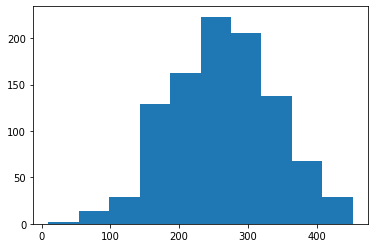

<IPython.core.display.Javascript object>

In [22]:
target_b, _ = boxcox(df["target"])
print(jarque_bera(target_b))
plt.hist(target_b)
plt.show()

Still not normal

## 3 ##
Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?


Well, obviously the ones used in it's creation are going to be correlated with it.

The variables correlated with those scores will therefore also be correlated with it.

In [27]:
df.groupby("gender").mean()[["target"]]

,target
gender,
female,68.085425
male,66.560166


<IPython.core.display.Javascript object>

In [26]:
df.groupby("test preparation course").mean()[["target"]]


,target
test preparation course,
completed,71.925978
none,64.798676


<IPython.core.display.Javascript object>

In [28]:
df.groupby("lunch").mean()[["target"]]


,target
lunch,
free/reduced,61.379577
standard,70.636434


<IPython.core.display.Javascript object>

In [29]:
df.groupby("parental level of education").mean()[["target"]]

,target
parental level of education,
associate's degree,69.147523
bachelor's degree,71.290254
high school,62.857143
master's degree,72.635593
some college,68.139381
some high school,64.705307


<IPython.core.display.Javascript object>

In [31]:
df.groupby("race/ethnicity").mean()[["target"]]

,target
race/ethnicity,
group A,62.651685
group B,64.964474
group C,66.464734
group D,68.725191
group E,73.019643


<IPython.core.display.Javascript object>

You can see a decent difference in all of them, except between genders, with the biggest differences coming from the type of lunch and completing the prep course. A lof of these are probably correlated with income and reflective of that unobserved variable, particularly the lunch type. It would be hard to say that there is a sig difference between most of the races, but between a and e there is probably one (check for this).
